In [3]:
# OpenML에서 MNIST 다운 받기
from sklearn.datasets import fetch_openml

# fetch_openml() 함수는 기본적으로 입력을 판다스 데이터 프레임, 레이블을 판다스 시리즈로 반환
# MNIST 데이터셋은 이미지이므로 데이터 프레임 맞지 않으므로 as_frame=False
mnist = fetch_openml('mnist_784', as_frame=False)

# 배열 확인
X, y = mnist.data, mnist.target
print(X.shape)
print(X)
print(y.shape)
print(y)

(70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000,)
['5' '0' '4' ... '4' '5' '6']


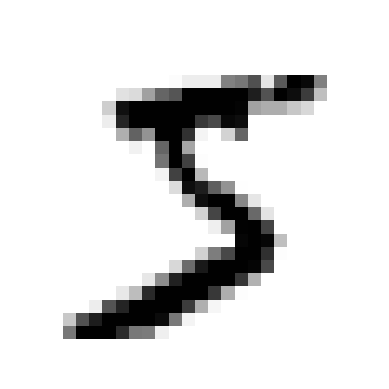

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [6]:
y[0]

'5'

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_train_5 = (y_train == '5') # 5는 True이고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# 이 모델을 이용해 숫자 5 이미지 감지
sgd_clf.predict([some_digit])

array([ True])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [13]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [16]:
y_train_perfect_predictions = y_train_5 #완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score
print('정밀도:', round(precision_score(y_train_5, y_train_pred),2))
print('재현율:', round(recall_score(y_train_5, y_train_pred),2))

정밀도: 0.84
재현율: 0.65


In [23]:
from sklearn.metrics import f1_score
print('F1-Score:', round(f1_score(y_train_5, y_train_pred),2))

F1-Score: 0.73


In [25]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)

threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]


In [26]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [34]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
# 모든 임곗값에 대한 정밀도와 재현율 계산
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [47]:
# 한글 깨지는 문제 해결
import platform
path = "c:/windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknonw system')

C:\Users\niceq\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


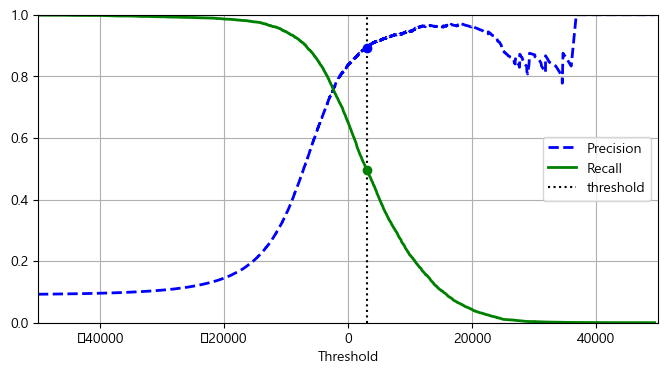

In [48]:
# 임곗값의 함수로 정밀도와 재현율 그래프 그리기
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# 그리드, 범례, 축, 레이블 등 추가
idx = (thresholds >= threshold).argmax()  # 첫 번째 index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

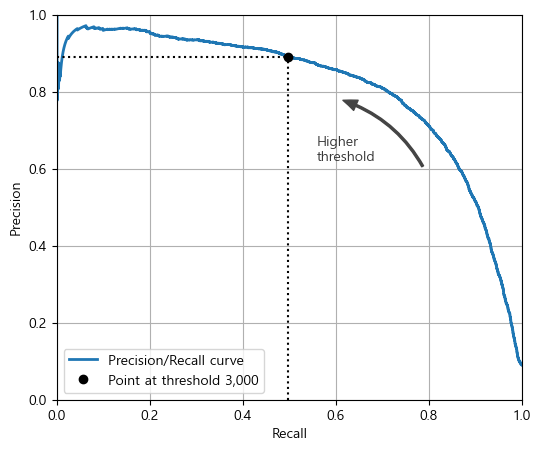

In [49]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [52]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [53]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

# 이 예측에 대한 정밀도와 재현율 확인
precision_score(y_train_5, y_train_pred_90)
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

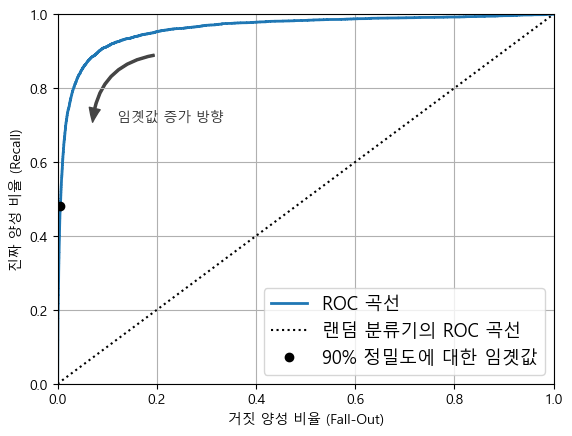

In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# ROC 곡선 그리기
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label='ROC 곡선')
plt.plot([0, 1], [0, 1], 'k:', label='랜덤 분류기의 ROC 곡선')
plt.plot([fpr_90], [tpr_90], "ko", label='90% 정밀도에 대한 임곗값')

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "임곗값 증가 방향", color="#333333")
plt.xlabel('거짓 양성 비율 (Fall-Out)')
plt.ylabel('진짜 양성 비율 (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

In [57]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [58]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [59]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [60]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [61]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

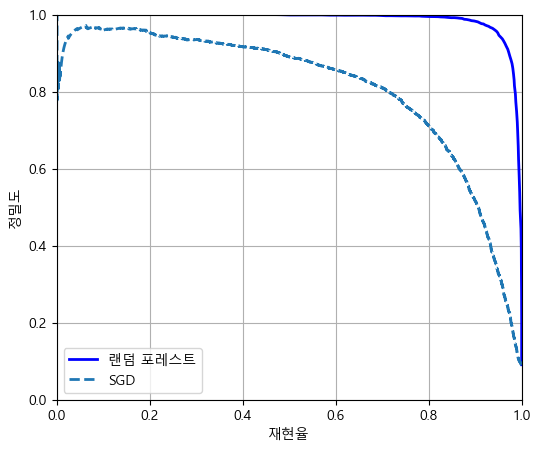

In [62]:
plt.figure(figsize=(6, 5))

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="랜덤 포레스트")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("재현율")
plt.ylabel("정밀도")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [64]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # 양성 확률 ≥ 50%
print('F1-Score:', round(f1_score(y_train_5, y_train_pred_forest), 4))
print('ROC_AUC Score:', round(roc_auc_score(y_train_5, y_scores_forest), 4))
print('Precision Score:', round(precision_score(y_train_5, y_train_pred_forest), 4))
print('Recall Score:', round(recall_score(y_train_5, y_train_pred_forest), 4))

F1-Score: 0.9275
ROC_AUC Score: 0.9983
Precision Score: 0.9897
Recall Score: 0.8725


In [65]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:200], y_train[:200])

SVC(random_state=42)

In [66]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [70]:
some_digit_scores = svm_clf.decision_function([some_digit])
print('점수 반환:', some_digit_scores.round(2))
print('가장 높은 점수:', round(some_digit_scores.max(), 2))

class_id = some_digit_scores.argmax()
print('가장 높은 점수의 클래스:', class_id)

점수 반환: [[ 1.76  3.85  6.13  8.27  0.75  9.29 -0.25  2.79  7.12  4.84]]
가장 높은 점수: 9.29
가장 높은 점수의 클래스: 5


In [72]:
print('클래스 레이블 확인:\n',svm_clf.classes_)
print('class5의 레이블:', svm_clf.classes_[class_id])

클래스 레이블 확인:
 ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
class5의 레이블: 5


In [75]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

# 훈련된 분류기 개수 확인
print(ovr_clf.predict([some_digit]))
print('훈련된 분류기 개수:', len(ovr_clf.estimators_))

['5']
훈련된 분류기 개수: 10


In [76]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [77]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [78]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype('float64'))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

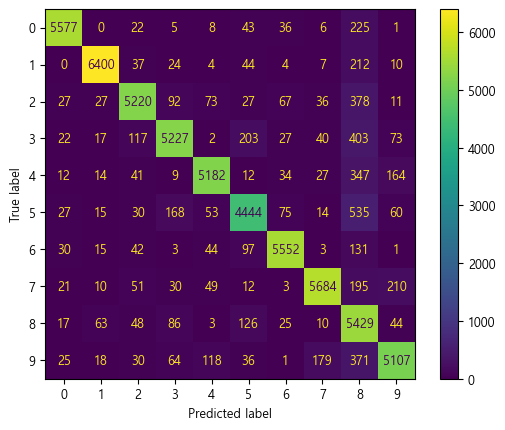

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
plt.rc('font', size=9)  # 폰트 크기 축소
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

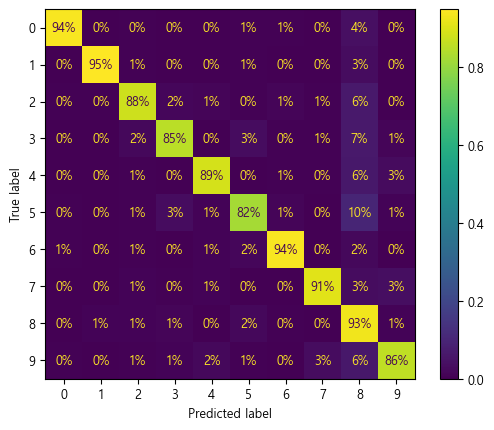

In [84]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                       normalize='true', values_format='.0%')
plt.show()

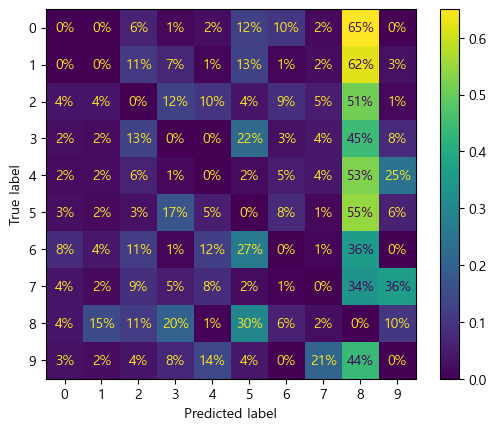

In [85]:
sample_weight = (y_train_pred != y_train)
plt.rc('font', size=10)  # 폰크 크기 조정
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()

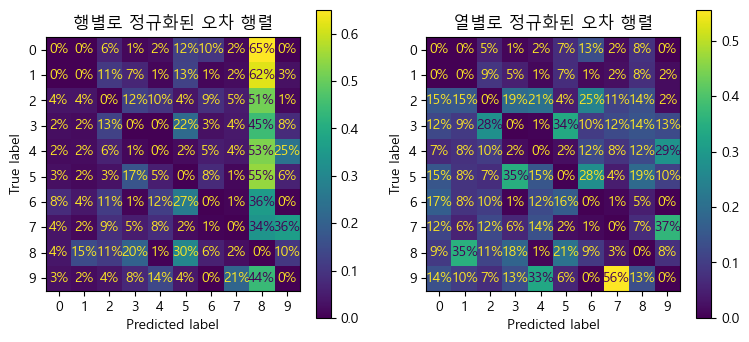

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
# 행 기준
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("행별로 정규화된 오차 행렬")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("열별로 정규화된 오차 행렬")
plt.show()
plt.rc('font', size=14) 

In [87]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

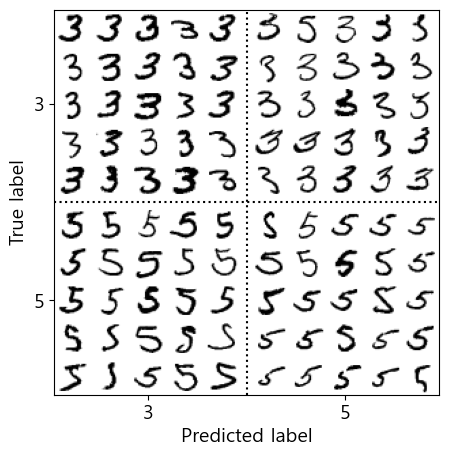

In [88]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [91]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

# 예측을 만들면 레이블 두 개 출력
knn_clf.predict([some_digit])

array([[False,  True]])

In [93]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [97]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
# 속도를 높이기 위해 훈련 세트에서 처음 2000개 이미지만 사용
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

# ClassifierChain을 통한 예측 수행
chain_clf.predict([some_digit])

array([[0., 1.]])

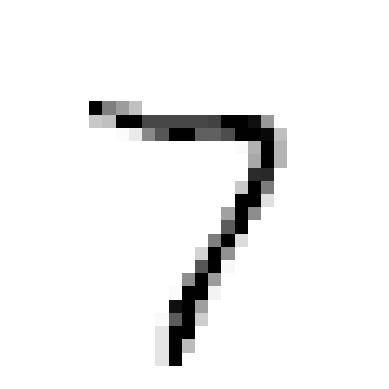

In [99]:
np.random.seed(42) # 동일하게 재현되도록 하기 위해 지정
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

# 분류기를 훈련시켜 잡음이 섞인 이미지를 깨끗하게 만들기
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()